In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('seaborn')

# 讀入資料

In [2]:
data = pd.read_csv('NSS fitted result from Excel.csv')
data = data.iloc[1:, ]

# 建立模型

In [3]:
# Nelson-Siegel-Svensson Approach
def function_NSS(t, B_0, B_1, B_2, B_3, theta_NSS, vega):
    return (
        B_0 +
        B_1 * ((1 - np.exp(-t/theta_NSS)) / (t/theta_NSS)) +
        B_2 * (((1 - np.exp(-t/theta_NSS)) / (t/theta_NSS)) - np.exp(-t/theta_NSS)) +
        B_3 * (((1 - np.exp(-t/vega)) / (t/vega)) - np.exp(-t/vega))
    )

# Fit 模型

In [4]:
popt_NSS, pcov_NSS = curve_fit(
    function_NSS,
    data['Required Tenor (years)'],
    data['R(0, T)'],
    maxfev=50000
)

In [5]:
MSE = sum(list(map(
    lambda x: x*x,
    (
        function_NSS(data['Required Tenor (years)'], *popt_NSS) -
        data['R(0, T)']
    )
)))

print(MSE)

2.7643847271464797e-07


# 畫出結果

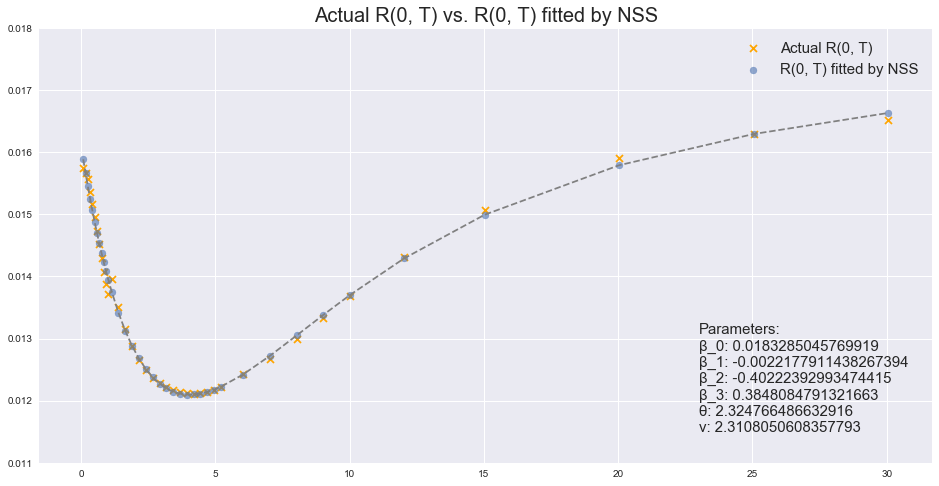

In [6]:
plt.figure(figsize=(16, 8), facecolor='white')

plt.scatter(
    data['Required Tenor (years)'],
    data['R(0, T)'],
    marker='x', color='orange',
    label='Actual R(0, T)'
)

plt.scatter(
    data['Required Tenor (years)'],
    function_NSS(data['Required Tenor (years)'], *popt_NSS),
    label='R(0, T) fitted by NSS', alpha=0.6
)

plt.plot(
    data['Required Tenor (years)'],
    function_NSS(data['Required Tenor (years)'], *popt_NSS),
    color='grey', ls='--'
)

plt.legend(fontsize=15)

plt.ylim(0.011, 0.018)

p = 'Parameters:'
a='β_0: {}'.format(popt_NSS[0])
b='β_1: {}'.format(popt_NSS[1])
c='β_2: {}'.format(popt_NSS[2])
d='β_3: {}'.format(popt_NSS[3])
e='θ: {}'.format(popt_NSS[4])
f='v: {}'.format(popt_NSS[5])
text = '{}\n{}\n{}\n{}\n{}\n{}\n{}'.format(p, a, b, c, d, e, f)
plt.text(23, 0.0115, text, fontsize=15)
plt.title('Actual R(0, T) vs. R(0, T) fitted by NSS', fontsize=20);